<h1>Квадратичные сплайны<h1>

In [40]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(suppress=True) # чтобы оч маленькие значения печатались в виде нулей

In [58]:
# Исходная функция
def fn(x):
    return x**2 + 4*np.sin(x) - 2 

<h1>По $m$ равноотстоящим узлам<h1>

In [70]:
a = float(input('Введите левую границу a: '))
b = float(input('Введите правую границу b: '))
m = int(input('Введите кол-во равноотстоящих узлов m (целое число): '))

x = np.linspace(a, b, m)

# n - число квадратичных сплайнов, у каждого 3 неизвестных - значит, у нас 3*n неизвестных
# Надо решить 3*n уравнения
n = m - 1


# AB = C
A = np.zeros((3*n, 3*n))*1.0
C = np.zeros(3*n)*1.0

for i in range(n):
    A[i, i] = x[i]**2
    A[i, n+i] = x[i]
    A[i, 2*n+i] = 1
    
    # Строки [n, 2n-1]
    A[n+i, i] = x[i+1]**2
    A[n+i, n+i] = x[i+1]
    A[n+i, 2*n+i] = 1
    
    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])
    
# Строки [2n, 3n-1]
for j in range(n-1): 
    A[2*n+j, [j, j+1, n+j, n+j+1]] = 2*x[j+1], -2*x[j+1], 1, -1
#     print('A[{0}, [{1}, {2}, {3}, {4}]:'.format(2*n+j, j, j+1, n+j, n+j+1), 
#           A[2*n+j, [j, j+1, n+j, n+j+1]])

# В последней строке задаем a_1 = 1    
A[3*n-1, 0] = 1

# Решаем относительно b
B = np.linalg.solve(A,C)

ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:]

Введите левую границу a: -10
Введите правую границу b: 10
Введите кол-во равноотстоящих узлов m (целое число): 100


<h1>Отрисуем квадратичный сплайн по $m$ равноотстоящим узлам<h1>

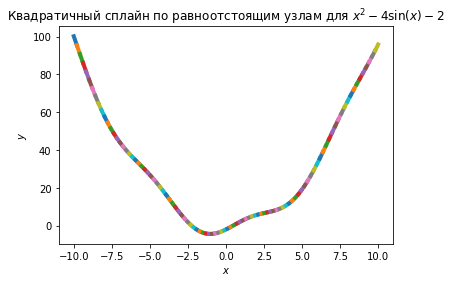

In [82]:
plt.figure()
for k in range(n):
    xspline = np.linspace(x[k], x[k+1], 100)
    yspline = ai[k]*xspline**2 + bi[k]*xspline + ci[k]    
    plt.plot(xspline, yspline, '-', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Квадратичный сплайн по равноотстоящим узлам для $x^2 - 4 \sin(x) - 2$')
plt.show()

<h1>Оптимальные узлы Чебышева<h1>

In [83]:
# оптимальные узлы Чебышева
chebish = []
for i in range(0, m):
    chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(m+1))) + (b+a)))

In [84]:
# n - число квадратичных сплайнов по узлам Чебышева, у каждого 3 неизвестных - значит, у нас 3*n неизвестных
# Надо решить 3*n уравнения
n = m - 1

# A_opt * B_opt = C_opt
A_opt = np.zeros((3*n, 3*n))*1.0
C_opt = np.zeros(3*n)*1.0

for i in range(n):
    A_opt[i, i] = chebish[i]**2
    A_opt[i, n+i] = chebish[i]
    A_opt[i, 2*n+i] = 1
    
    # Строки [n, 2n-1]
    A_opt[n+i, i] = chebish[i+1]**2
    A_opt[n+i, n+i] = chebish[i+1]
    A_opt[n+i, 2*n+i] = 1
    
    C_opt[i] = fn(chebish[i])
    C_opt[n+i] = fn(chebish[i+1])
    
# Строки [2n, 3n-1]
for j in range(n-1): 
    A_opt[2*n+j, [j, j+1, n+j, n+j+1]] = 2*chebish[j+1], -2*chebish[j+1], 1, -1

# В последней строке задаем a_1 = 1    
A_opt[3*n-1, 0] = 1

# Решаем относительно b
B_opt = np.linalg.solve(A_opt, C_opt)

ai_opt = B_opt[:n]
bi_opt = B_opt[n:2*n]
ci_opt = B_opt[2*n:]

<h1>Отрисуем квадратичный сплайн по $m$ узлам Чебышева<h1>

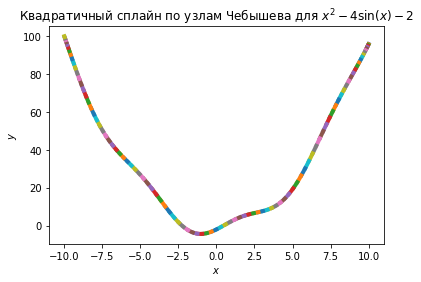

In [85]:
plt.figure()

for k in range(n):
    xspline_opt = np.linspace(chebish[k], chebish[k+1])
    yspline_opt = ai_opt[k]*xspline_opt**2 + bi_opt[k]*xspline_opt + ci_opt[k]
    plt.plot(xspline_opt, yspline_opt, '-', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Квадратичный сплайн по узлам Чебышева для $x^2 - 4 \sin(x) - 2$')
fig.set_figheight(7)
fig.set_figwidth(10)
plt.show()